In [138]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from collections import defaultdict
import ppscore as pps

from warnings import filterwarnings
filterwarnings('ignore')

In [139]:
## UDF for experimenting several classification models
def experiment(X_train,X_test,y_train,y_test):
    """
    This function want to do an experiment for several models.
    We just need data input

    Parameter
    ---------
    X_train = training data contains several features
    X_test = testing data contains several features
    y_train = train target
    y_test = test target
    """
    result = defaultdict(list)
    
    knn = KNeighborsClassifier()
    logreg = LogisticRegression()
    dtc = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    grad = GradientBoostingClassifier()
    
    list_model = [('K-Nearest Neighbor',knn),
                  ('Logistic Regression',logreg),
                  ('Decision Tree',dtc),
                  ('Random Forest',rf),
                  ('Gradient Boosting',grad)
                 ]
    
    for model_name,model in list_model:
        start = dt.now()
        model.fit(X_train,y_train)
        duration = (dt.now()-start).total_seconds()
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        
        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        result['duration'].append(duration)
        
    return result

In [140]:
df = pd.read_csv('Clicked Ads Dataset.csv')

In [42]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


1) Daily Time Spent on Site: Lamanya tinggal disuatu situs (harian) dalam satuan menit
2) Age: Umur user dalam satuan tahun
3) Area Income: Pendapatan user dalam satuan rupiah
4) Daily Internet Usage: Penggunaan internet harian dalam satuan menit
5) Male: Gender user
6) Timestamp: Kapan user visit sebuah situs
7) Clicked on Ad: Click atau tidak iklan yang ditampilkan
8) city: Kota asal user
9) province: Provinsi asal user
10) category: Kategori product yang dikunjungi

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


# TUGAS 1

## Buat analisis univariate pada kolom umur, penggunaan internet harian, dan daily time spent on site dengan membedakan user yang mengklik iklan dan yang tidak

### Click on ad

Text(0.5, 1.0, 'Clicked on Ad Distribution')

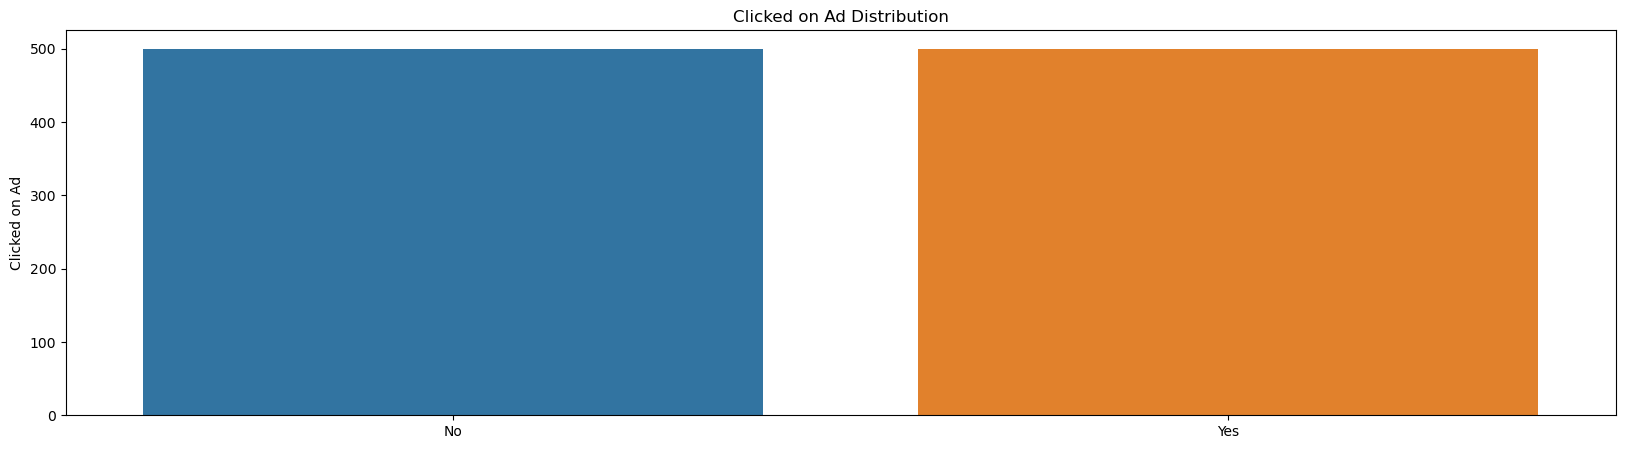

In [44]:
counts = df['Clicked on Ad'].value_counts()
fig = plt.figure(figsize = (20, 5))
sns.barplot(x=counts.index,y=counts)
plt.title("Clicked on Ad Distribution")

label memiliki jumlah yang cukup balanced (seimbang) sehingga tidak perlu melakukan preprocessing untuk mengatasi imbalanced class.

### Age

Text(0.5, 1.0, 'Age Distribution')

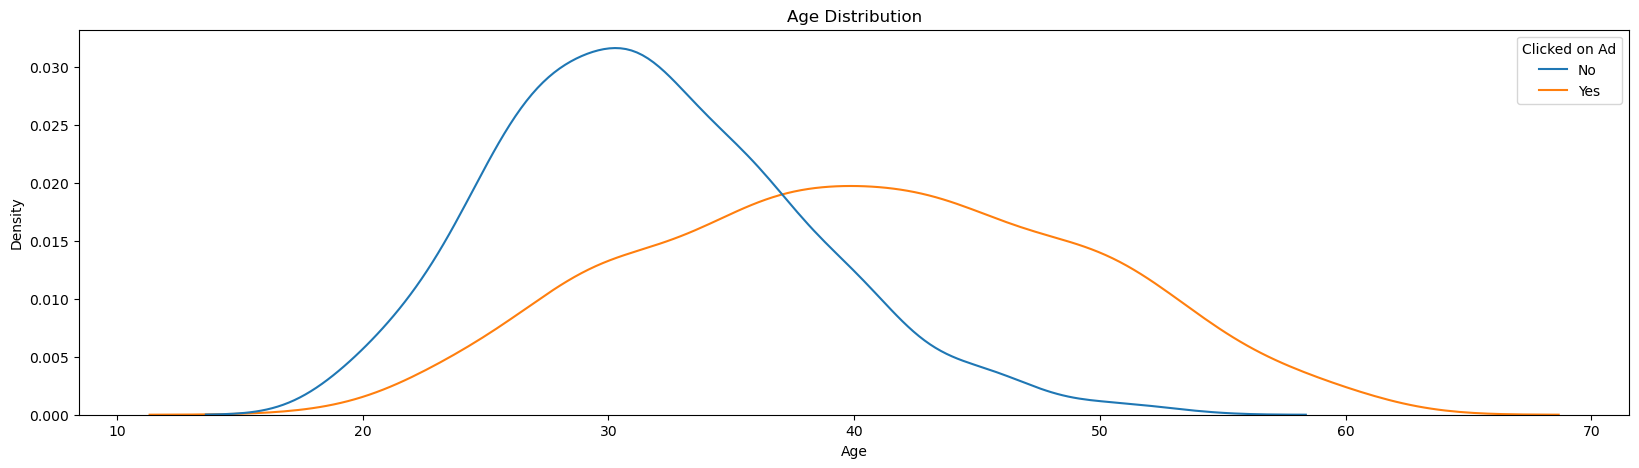

In [45]:
fig = plt.figure(figsize = (20, 5))
sns.kdeplot(x ='Age', data = df, hue='Clicked on Ad')
plt.title("Age Distribution")

berdasarkan grafik, umur 30 tahun keatas lebih banyak melakukan click on ad dibandingkan dengan umur 30 tahun kebawah. sehingga dapat disimpulkan bahwa banyak orang tua yang melakukan click on ad dibandingkan anak muda karena anak muda lebih selektif dalam melakukan click on ad.

### Daily time spent on site

Text(0.5, 1.0, 'Daily time spent on site Distribution')

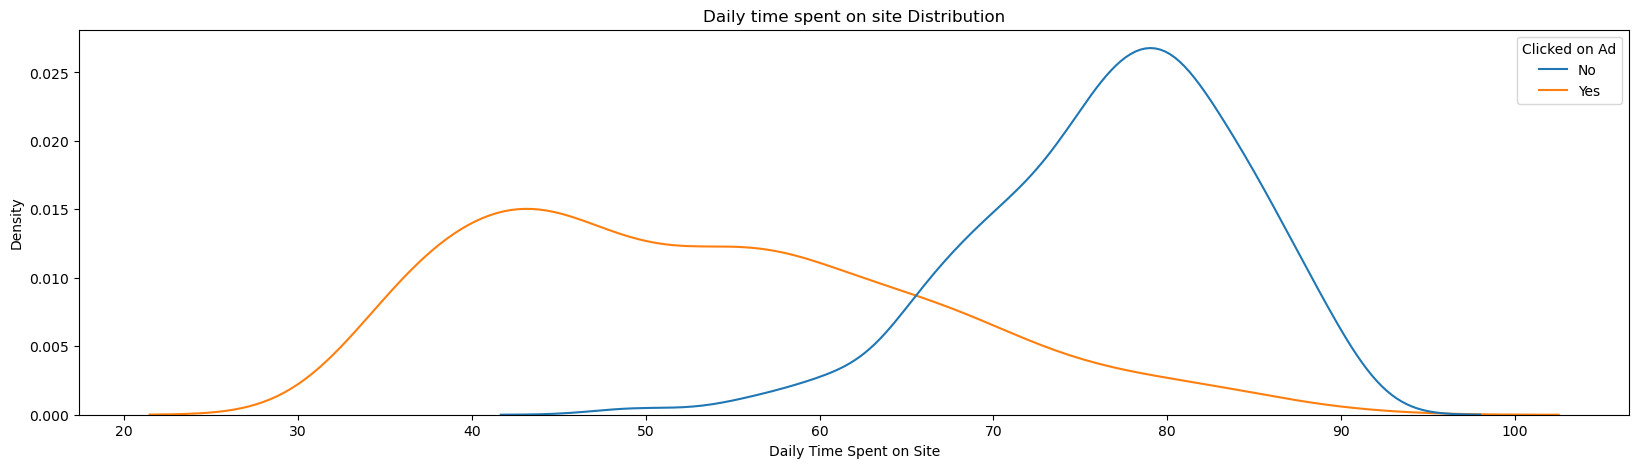

In [46]:
fig = plt.figure(figsize = (20, 5))
sns.kdeplot(data=df, x='Daily Time Spent on Site', hue='Clicked on Ad')
plt.title("Daily time spent on site Distribution")

user yang mengunjungi website dengan waktu sebentar lebih banyak melakukan click on ad dibandingkan user yang mengunjungi website dengan waktu lama. 

### Daily Internet usage on site

Text(0.5, 1.0, 'Daily Internet Usage on site Distribution')

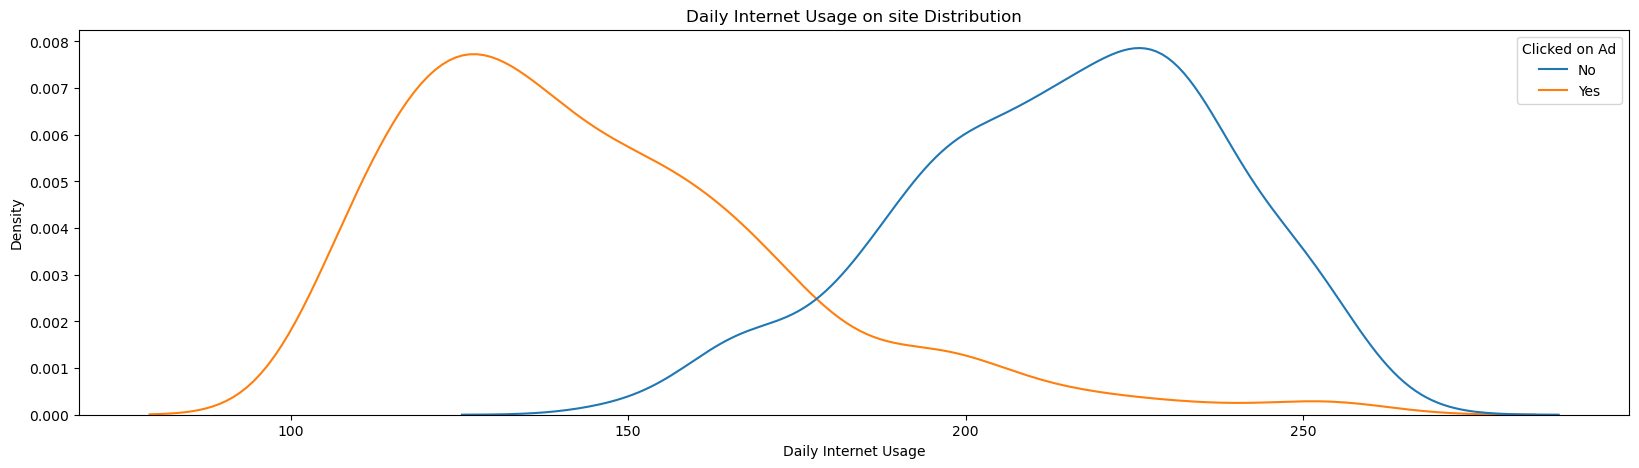

In [47]:
fig = plt.figure(figsize = (20, 5))
sns.kdeplot(data=df, x='Daily Internet Usage', hue='Clicked on Ad')
plt.title("Daily Internet Usage on site Distribution")

user yang jarang menggunakan internet lebih banyak melakukan click on ad dibandingkan pengguna yang sering menggunakan internet. hal ini dapat memberi pentunjuk bahwa user yang jarang menggunakan internet lebih memperhatikan ads.

daily internet usage dan daily time spent on site memiliki distribusi yang mirip.

### Daily Internet Usage vs daily time spent on site

Text(0.5, 1.0, 'Daily Internet Usage vs daily time spent on site')

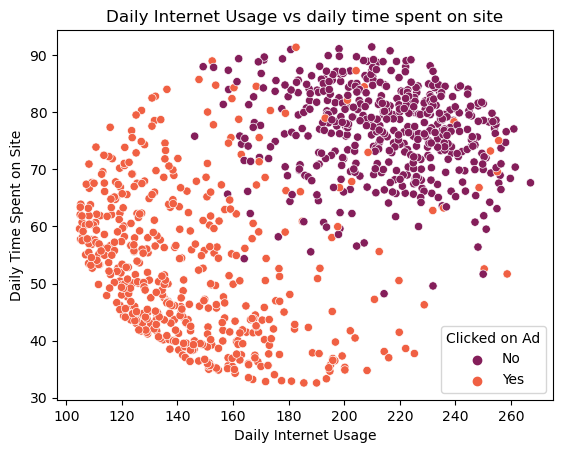

In [48]:
sns.scatterplot(x='Daily Internet Usage',y='Daily Time Spent on Site', 
                hue='Clicked on Ad', data=df, palette='rocket')
plt.title("Daily Internet Usage vs daily time spent on site")

Berdasarkan plot di atas, terdapat 2 kelompok yaitu user aktif internet dan user non aktif internet. user aktif cenderung tidak melakukan click on ad sedangkan user non aktif cenderung melakukan click on ad.

sehingga dapat dilakukan pengoptimalan sistem advertisment terhadap user yang tidak aktif menggunakan internet.

### Age vs Daily Time Spent on Site

Text(0.5, 1.0, 'Age vs Daily Time Spent on Site')

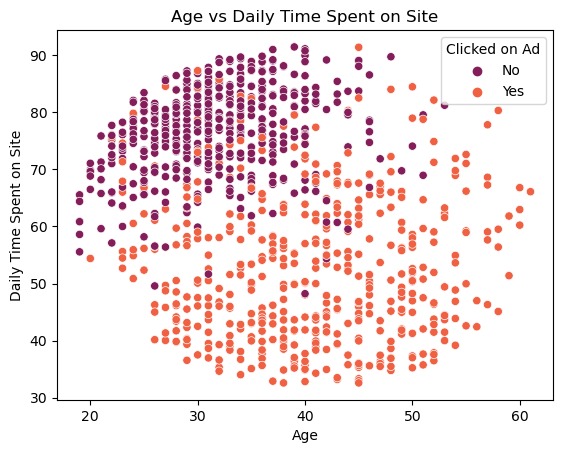

In [49]:
sns.scatterplot(x='Age',y='Daily Time Spent on Site', data=df, hue="Clicked on Ad", palette='rocket')
plt.title("Age vs Daily Time Spent on Site")

Berdasarkan plot di atas, terdapat 2 kelompok yaitu pertama user dengan umur < 40 tahun dengan mengunjungi website lebih lama dan kedua user dengan umur > 40 tahun dengan mengunjungi website sebentar. kelompok kedua dengan user umur > 40 tahun dan mengunjungi website lebih lama cenderung melakukan click on ad.

### Age vs Daily Internet Usage

Text(0.5, 1.0, 'Age vs Daily Internet Usage')

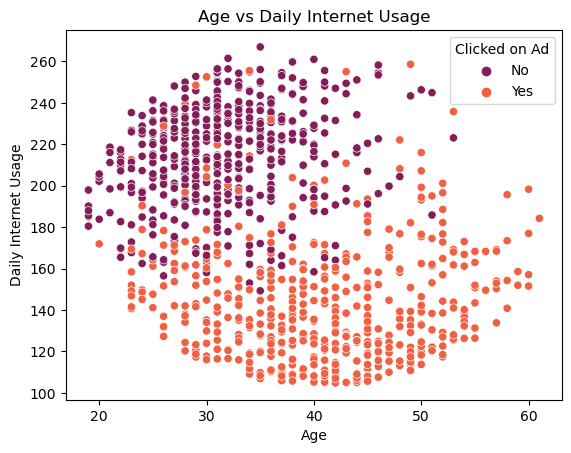

In [50]:
sns.scatterplot(x='Age',y='Daily Internet Usage', 
                hue='Clicked on Ad', data=df, palette='rocket')
plt.title("Age vs Daily Internet Usage")

age vs daily time spent on site dan age vs daily internet usage memiliki 2 kelompok yang mirip yaitu user dengan user > 40 tahun dan jarang menggunakan internet lebih banyak melakukan click on ad.

sehingga dapat dilakukan pengoptimalan sistem advertisment pada user-user yang berumur lebih dari 40 tahun.

## Buatlah bivariate analysis pada variabel yang telah diteliti pada univariate analysis

In [51]:
df.columns

Index(['Unnamed: 0', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category'],
      dtype='object')

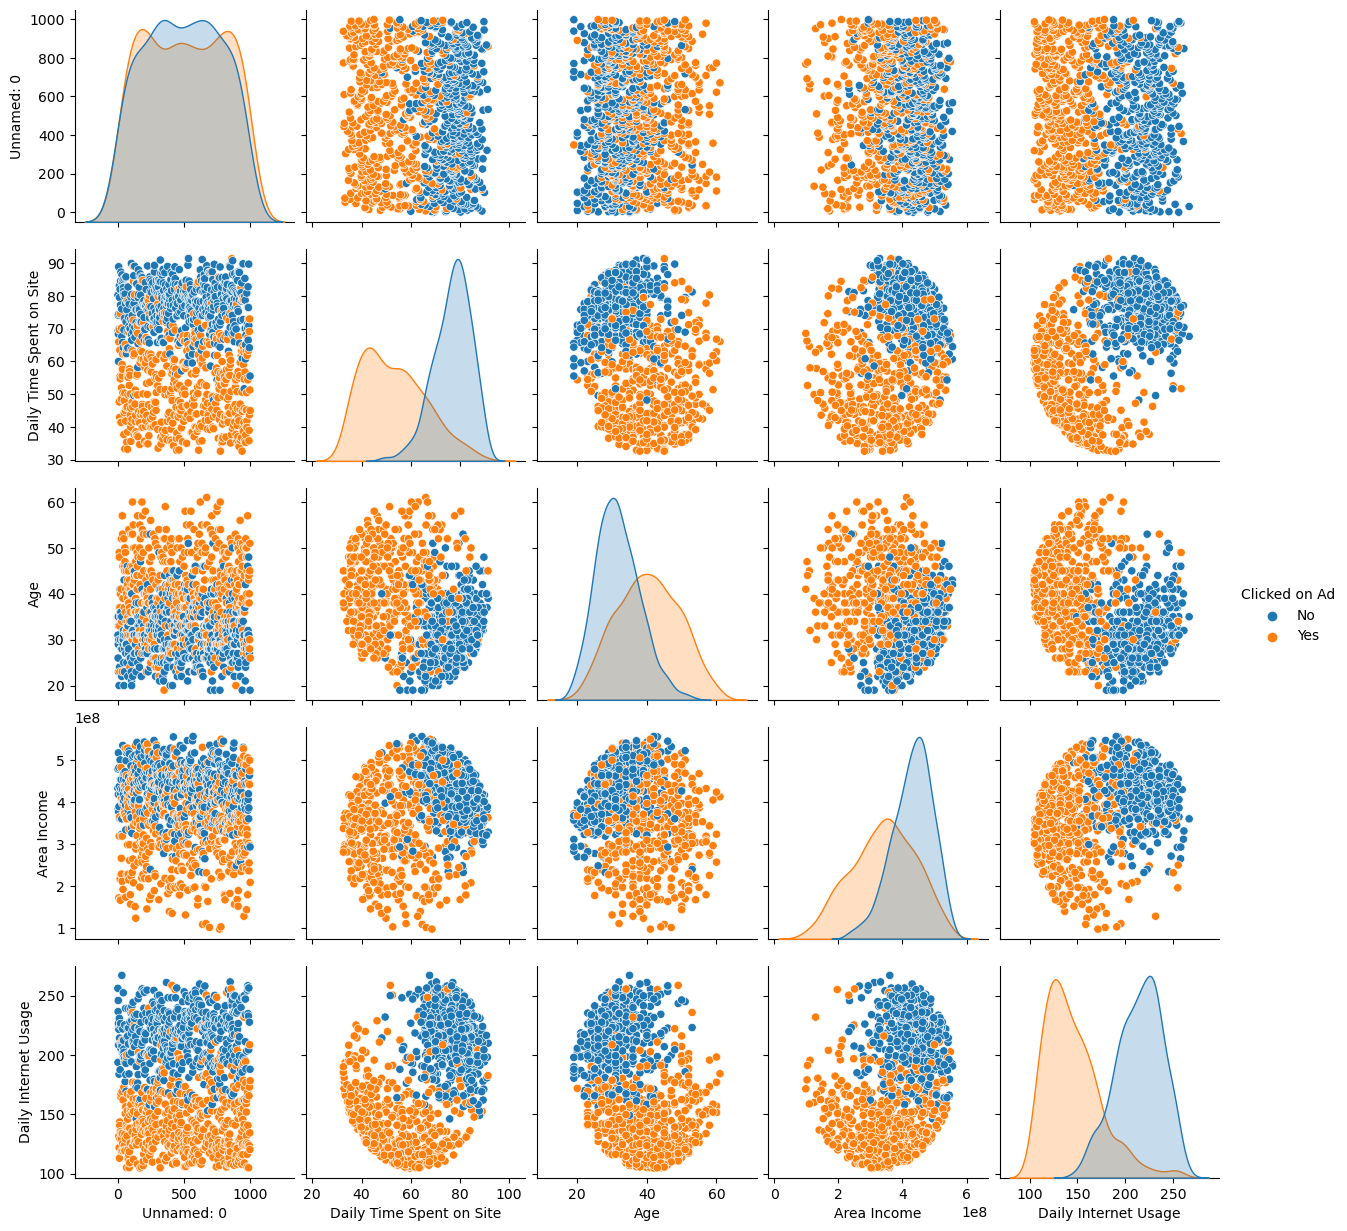

In [52]:
sns.pairplot(df,hue='Clicked on Ad')
plt.show()

## Buatlah korelasi antar kolom dan lakukan multivariate analysis

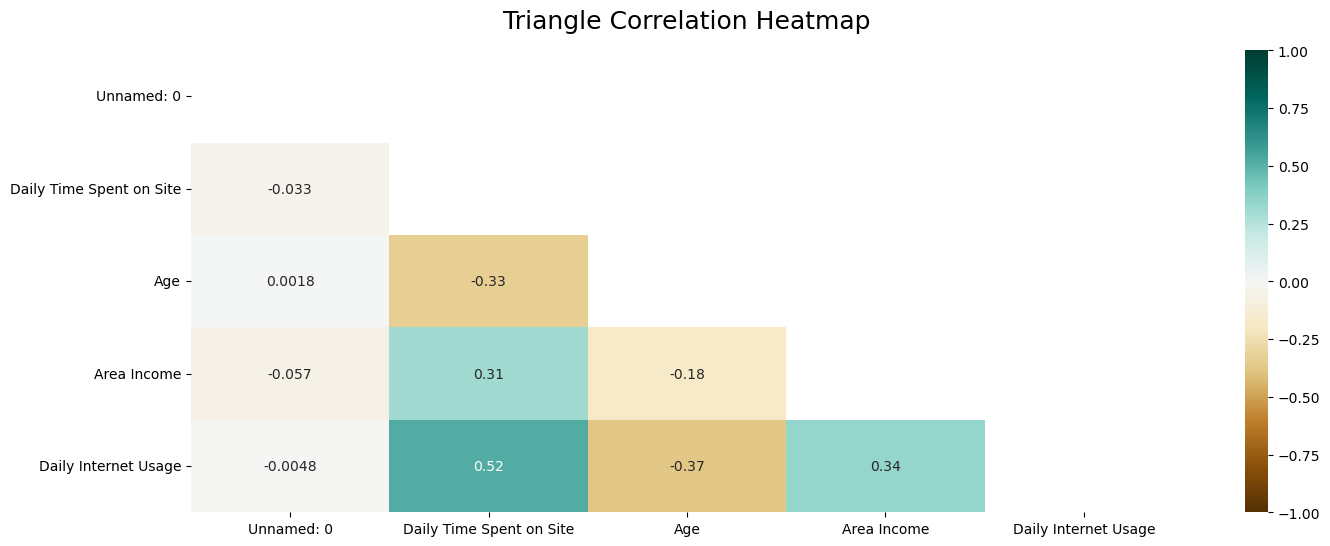

In [53]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Dari korelasi di atas tidak menemukan adanya multicorrelation (korelasi antar variable) sehingga dapat menggunakan semua feature untuk dilakukan modeling. Namun dengan menggunakan korelasi pearson tidak dapat mengetahui hubungan antara feature dengan targetnya. Maka perlu menggunakan PPS (Predictive Power Score) dalam menghitung hubungan antar feature dengan targetnya.

### Correlation using PPScore

In [54]:
!pip install -U ppscore

In [55]:
import ppscore as pps

In [56]:
df_pps = pps.matrix(df)
matrix_df = df_pps[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

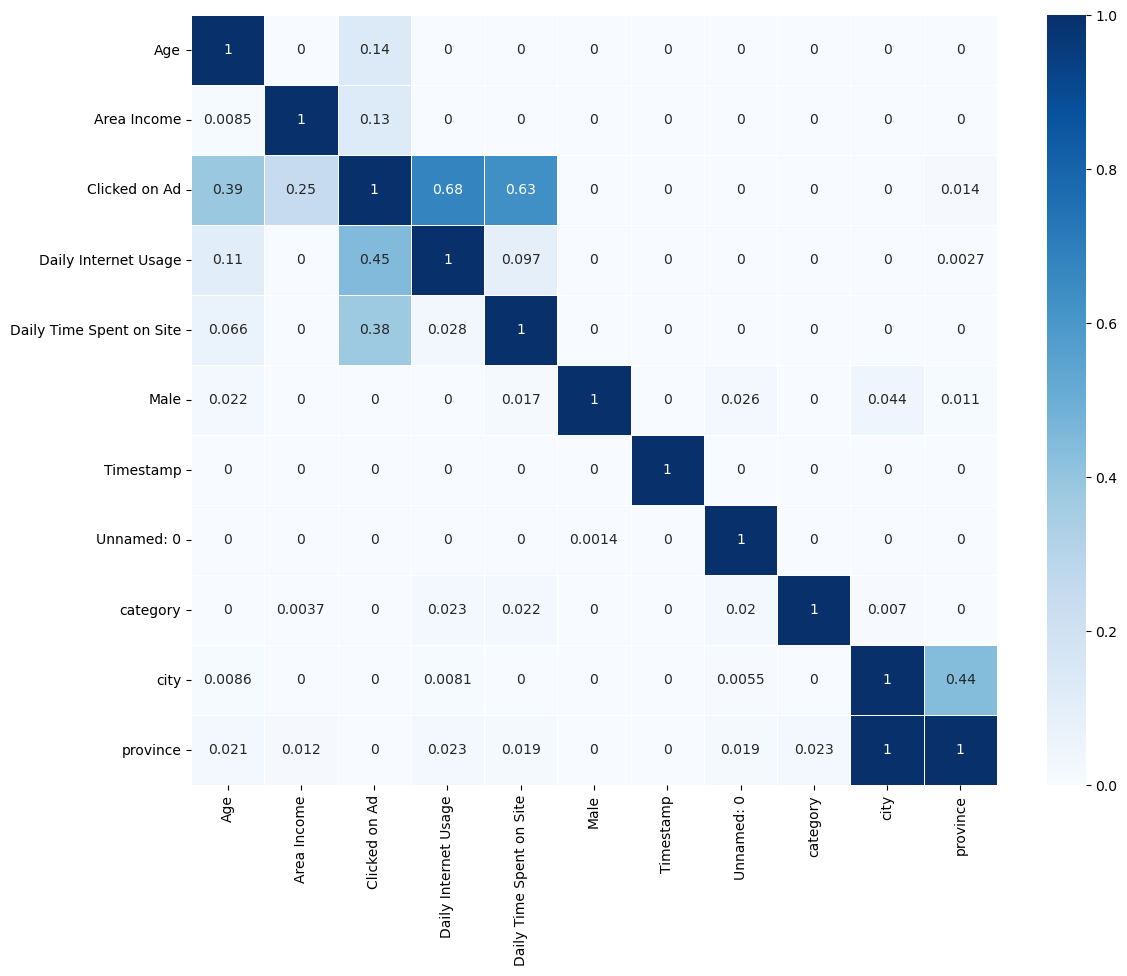

In [57]:
plt.figure(figsize=(13,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Feature yang cukup berhubungan dengan target adalah
1) Age
2) Area income
3) daily internet usage
4) daily time spent on site

# TUGAS 2

## Bersihkan dataset dari missing value dan duplicated value

In [141]:
df.duplicated().sum()

0

In [142]:
df.isnull().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [143]:
df1 = df.dropna()

karena jumlah data null sedikit maka dilakukan penghapusan.

## Lakukan feature encoding pada dataset

In [144]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

In [145]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                963 non-null    int64         
 1   Daily Time Spent on Site  963 non-null    float64       
 2   Age                       963 non-null    int64         
 3   Area Income               963 non-null    float64       
 4   Daily Internet Usage      963 non-null    float64       
 5   Male                      963 non-null    object        
 6   Timestamp                 963 non-null    datetime64[ns]
 7   Clicked on Ad             963 non-null    object        
 8   city                      963 non-null    object        
 9   province                  963 non-null    object        
 10  category                  963 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 90.3+ KB


In [146]:
object_columns = df1.select_dtypes(include='object')

In [147]:
object_columns.columns

Index(['Male', 'Clicked on Ad', 'city', 'province', 'category'], dtype='object')

In [148]:
df1.rename(columns={'Male': 'Gender'}, inplace=True)

In [149]:
mapping_Gender = {
    'Perempuan' : 1,
    'Laki-Laki' : 0
}

mapping_Clicked_on_Ad = {
    'No'  : 0,
    'Yes' : 1

}

df1['Gender'] = df1['Gender'].map(mapping_Gender)
df1['Clicked on Ad'] = df1['Clicked on Ad'].map(mapping_Clicked_on_Ad)

In [150]:
df1['Gender'].unique()

array([1, 0], dtype=int64)

In [151]:
df1['Clicked on Ad'].unique()

array([0, 1], dtype=int64)

In [152]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                963 non-null    int64         
 1   Daily Time Spent on Site  963 non-null    float64       
 2   Age                       963 non-null    int64         
 3   Area Income               963 non-null    float64       
 4   Daily Internet Usage      963 non-null    float64       
 5   Gender                    963 non-null    int64         
 6   Timestamp                 963 non-null    datetime64[ns]
 7   Clicked on Ad             963 non-null    int64         
 8   city                      963 non-null    object        
 9   province                  963 non-null    object        
 10  category                  963 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 90.3+ KB


## Lakukan ekstraksi pada kolom yang berhubungan dengan waktu

In [153]:
df1['Month'] = df1['Timestamp'].dt.month
df1['Day of month'] = df1['Timestamp'].dt.day
df1['Day of week'] = df1['Timestamp'].dt.dayofweek
df1['Hour'] = df1['Timestamp'].dt.hour  

In [154]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                963 non-null    int64         
 1   Daily Time Spent on Site  963 non-null    float64       
 2   Age                       963 non-null    int64         
 3   Area Income               963 non-null    float64       
 4   Daily Internet Usage      963 non-null    float64       
 5   Gender                    963 non-null    int64         
 6   Timestamp                 963 non-null    datetime64[ns]
 7   Clicked on Ad             963 non-null    int64         
 8   city                      963 non-null    object        
 9   province                  963 non-null    object        
 10  category                  963 non-null    object        
 11  Month                     963 non-null    int64         
 12  Day of month          

In [155]:
df1 = df1.drop(columns=['Unnamed: 0', 'Timestamp'])

## Split data menjadi feature dan target

In [156]:
import numpy as np

In [165]:
X = df1.drop(columns=['Clicked on Ad'])
y = df1['Clicked on Ad']

In [166]:
X_dummy = pd.get_dummies(X)

# TUGAS 3

## Bagilah data secara terpisah yang nanti akan digunakan sebagai data train dan data test
## Hint: "Data train 70-80%, Data test 20-30%

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.33, random_state=42)

## Buatlah dua eksperimen model machine learning dengan beberapa jenis algoritma model machine learning, dimana eksperimen pertama tanpa menggunakan normalisasi data, dan yang kedua menggunakan normalisasi data.

### with normalization

In [169]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [170]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)

X_test_normalized = scaler.transform(X_test)

#### fit model 

In [171]:
result1 = experiment(X_train_normalized,X_test_normalized,y_train,y_test)
result1 = pd.DataFrame(result1)

In [172]:
result1

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.764151,0.75625,0.770701,0.000000
1,Logistic Regression,LogisticRegression(),0.965409,0.95000,0.980645,0.121033
2,Decision Tree,DecisionTreeClassifier(),0.940252,0.96250,0.922156,0.005000
3,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.965409,0.98125,0.951515,0.355429
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.962264,0.96875,0.956790,0.309967


#### evaluation

In [174]:
final_model = result1['model'][3]
y_pred = final_model.predict(X_test_normalized)

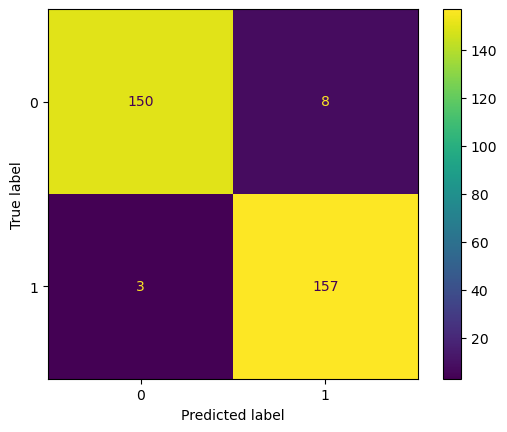

In [175]:
cm = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_model.classes_)

disp.plot()
plt.show()

#### feature importance

In [177]:
feature_imp = {}

feature_imp['columns'] = X_train.columns
feature_imp['feature_imp'] = result1['model'][3].feature_importances_

In [178]:
df_feature_imp = pd.DataFrame(feature_imp)
df_feature_imp = df_feature_imp.sort_values(['feature_imp'],ascending=False).head(20)

<AxesSubplot:xlabel='feature_imp', ylabel='columns'>

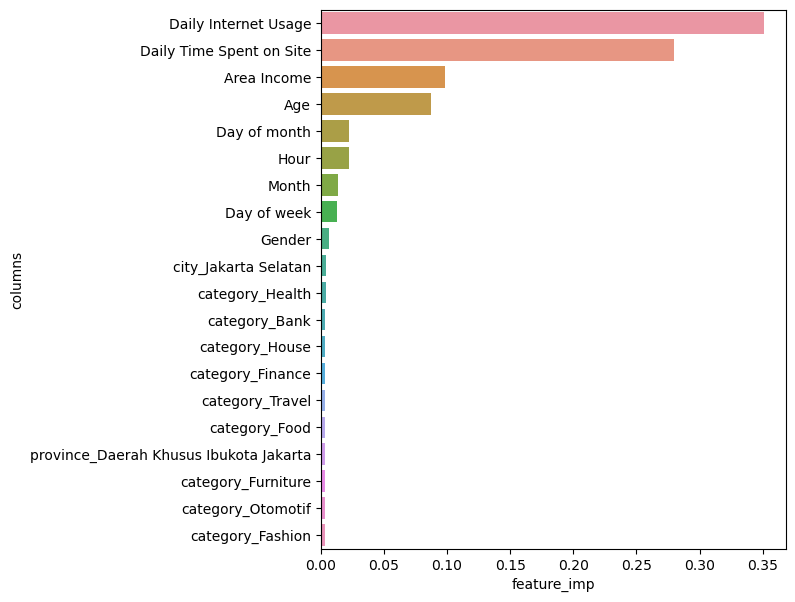

In [179]:
plt.figure(figsize=(6,7))
sns.barplot(x=df_feature_imp['feature_imp'],y=df_feature_imp['columns'])

### without normalization

In [180]:
df.head(2)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food


In [181]:
df2 = df.dropna()

In [182]:
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])

In [183]:
df2.rename(columns={'Male': 'Gender'}, inplace=True)

In [184]:
mapping_Gender = {
    'Perempuan' : 1,
    'Laki-Laki' : 0
}

mapping_Clicked_on_Ad = {
    'No'  : 0,
    'Yes' : 1

}

df2['Gender'] = df2['Gender'].map(mapping_Gender)
df2['Clicked on Ad'] = df2['Clicked on Ad'].map(mapping_Clicked_on_Ad)

In [185]:
df2['Month'] = df2['Timestamp'].dt.month
df2['Day of month'] = df2['Timestamp'].dt.day
df2['Day of week'] = df2['Timestamp'].dt.dayofweek
df2['Hour'] = df2['Timestamp'].dt.hour 

In [186]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                963 non-null    int64         
 1   Daily Time Spent on Site  963 non-null    float64       
 2   Age                       963 non-null    int64         
 3   Area Income               963 non-null    float64       
 4   Daily Internet Usage      963 non-null    float64       
 5   Gender                    963 non-null    int64         
 6   Timestamp                 963 non-null    datetime64[ns]
 7   Clicked on Ad             963 non-null    int64         
 8   city                      963 non-null    object        
 9   province                  963 non-null    object        
 10  category                  963 non-null    object        
 11  Month                     963 non-null    int64         
 12  Day of month          

In [188]:
df2 = df2.drop(columns=['Unnamed: 0', 'Timestamp'])

In [192]:
x = df2.drop(columns=['Clicked on Ad'])
y = df2['Clicked on Ad']

In [194]:
x_dummy = pd.get_dummies(x)

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
x_train, x_test, y_train, y_test = train_test_split(x_dummy, y, test_size=0.33, random_state=42)

#### fit model 

In [202]:
result1 = experiment(x_train,x_test,y_train,y_test)
result1 = pd.DataFrame(result1)

In [203]:
result1

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.647799,0.59375,0.669014,0.004003
1,Logistic Regression,LogisticRegression(),0.496855,0.00000,0.000000,0.024002
2,Decision Tree,DecisionTreeClassifier(),0.949686,0.96250,0.939024,0.011003
3,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.952830,0.96875,0.939394,0.432373
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.965409,0.97500,0.957055,0.311538
